# Graphes et Nettoyage

## import des dataframes

In [8]:
import pandas as pd
import os
from tabulate import tabulate

# Chemin vers le répertoire contenant les fichiers CSV
directory_path = 'Database/'

# Liste des noms de fichiers CSV à importer
file_names = ['customers.csv', 'order_items.csv', 'order_pymts.csv', 'order_reviews.csv', 'orders.csv', 'products.csv', 'sellers.csv', 'translation.csv']

# Dictionnaire pour stocker les DataFrames
dataframes = {}

# Importer chaque fichier CSV et stocker dans le dictionnaire
import_results = []

for file_name in file_names:
    print(f"Importation du fichier : {file_name}")
    file_path = os.path.join(directory_path, file_name)
    df_name = file_name.replace('.csv', '')  # Nom de la clé du dictionnaire sans extension
    dataframes[df_name] = pd.read_csv(file_path)
    
    # Préparer les données pour le tableau
    df_head = dataframes[df_name].head(5)
    head_list = df_head.values.tolist()
    headers = df_head.columns.tolist()
    
    # Ajouter les résultats d'importation pour ce fichier
    import_results.append({
        'File': df_name,
        'Head': tabulate(head_list, headers=headers, tablefmt='pipe')
    })

# Afficher les résultats d'importation
print("\nRésultats d'importation des fichiers CSV :")
for result in import_results:
    print(f"\nFichier : {result['File']}")
    print(result['Head'])

# Accéder aux DataFrames importés
customers = dataframes['customers']
order_items = dataframes['order_items']
order_pymts = dataframes['order_pymts']
order_reviews = dataframes['order_reviews']
orders = dataframes['orders']
products = dataframes['products']
sellers = dataframes['sellers']
translation = dataframes['translation']


Importation du fichier : customers.csv
Importation du fichier : order_items.csv
Importation du fichier : order_pymts.csv
Importation du fichier : order_reviews.csv
Importation du fichier : orders.csv
Importation du fichier : products.csv
Importation du fichier : sellers.csv
Importation du fichier : translation.csv

Résultats d'importation des fichiers CSV :

Fichier : customers
|   index | customer_id                      | customer_unique_id               |   customer_zip_code_prefix | customer_city         | customer_state   |
|--------:|:---------------------------------|:---------------------------------|---------------------------:|:----------------------|:-----------------|
|       0 | 06b8999e2fba1a1fbc88172c00ba8bc7 | 861eff4711a542e4b93843c6dd7febb0 |                      14409 | franca                | SP               |
|       1 | 18955e83d337fd6b2def6b18a428ac77 | 290c77bc529b7ac935b93aa66c333dc3 |                       9790 | sao bernardo do campo | SP               |
|  

## Courbe du nombre de commandes en fonction du temps

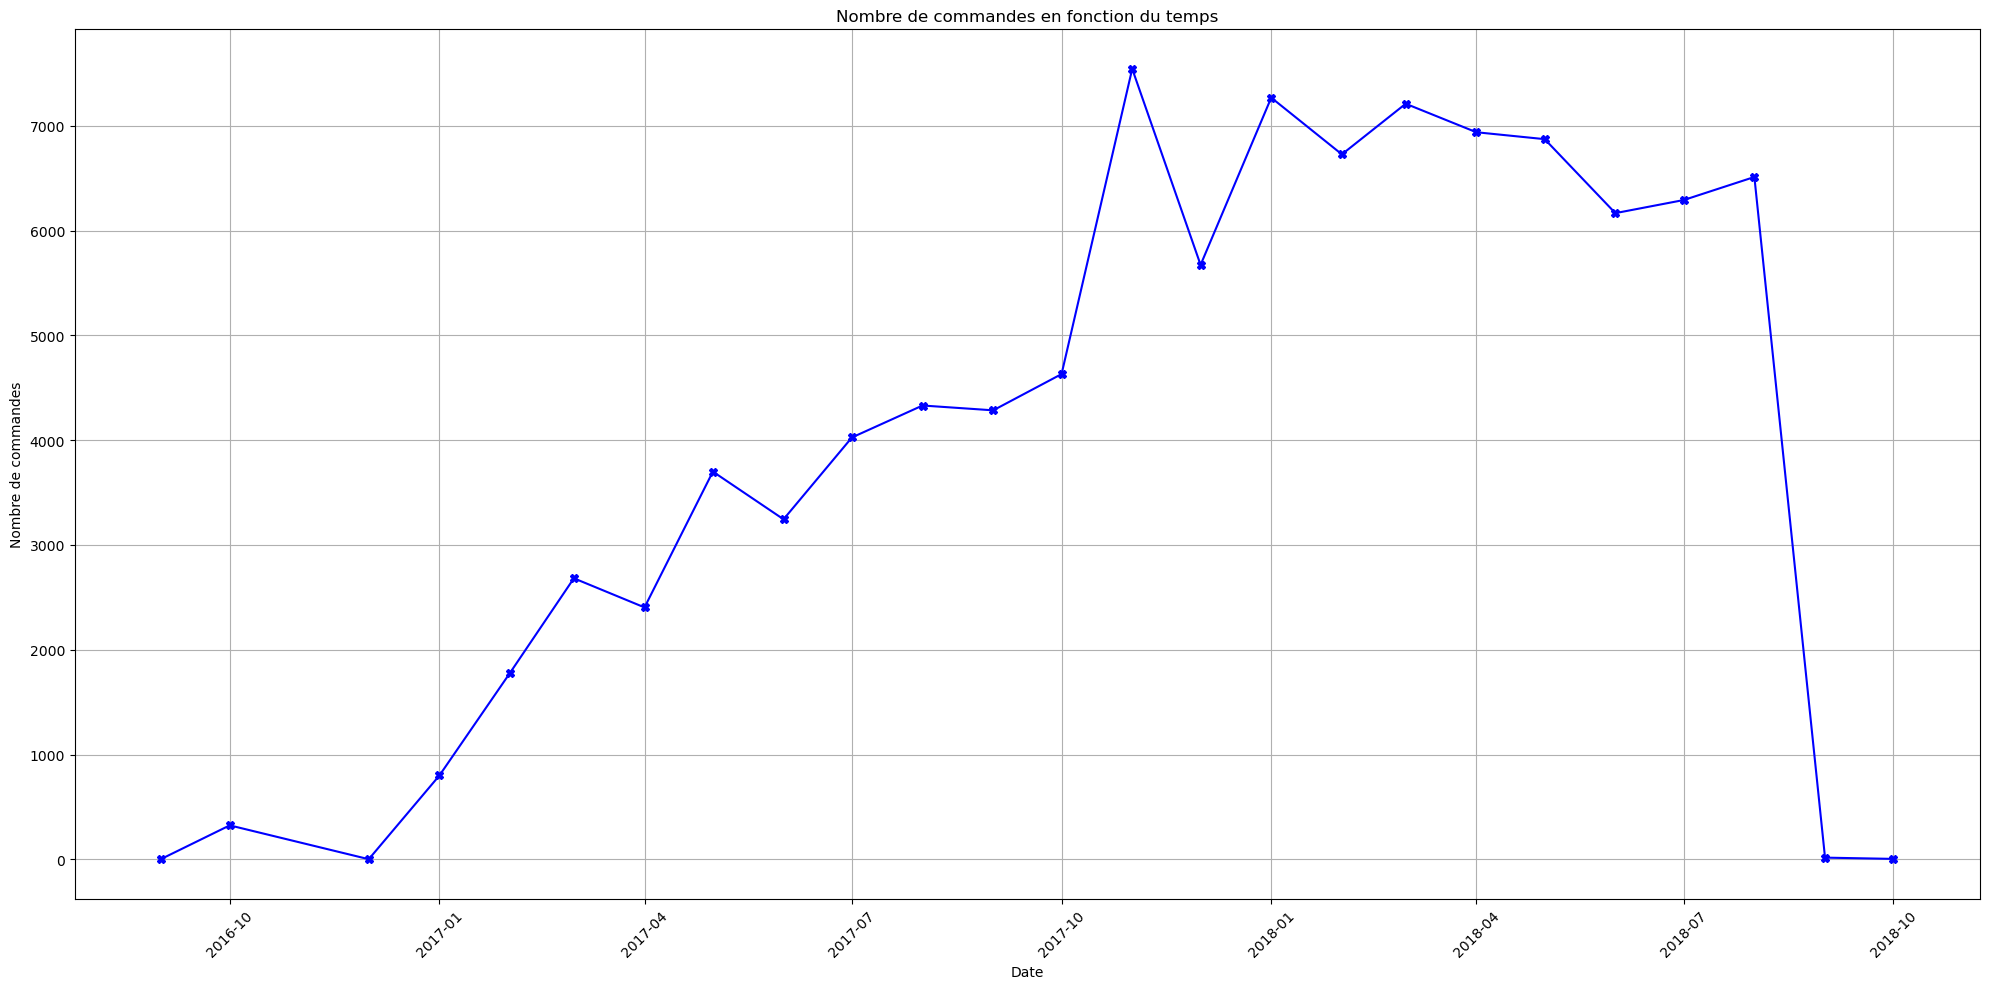

In [10]:
import matplotlib.pyplot as plt

orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# Grouper les commandes par date (par jour, mois, ou autre période si nécessaire)
order_counts = orders.groupby(orders['order_purchase_timestamp'].dt.to_period('M')).size()  # Comptage par jour

# Convertir l'index en datetime pour le tracé
order_counts.index = order_counts.index.to_timestamp()

# Tracer la courbe
plt.figure(figsize=(20, 10))
plt.plot(order_counts.index, order_counts.values, marker='X', linestyle='-', color='b')
plt.title('Nombre de commandes en fonction du temps')
plt.xlabel('Date')
plt.ylabel('Nombre de commandes')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Barplot répartition des moyens de paiements

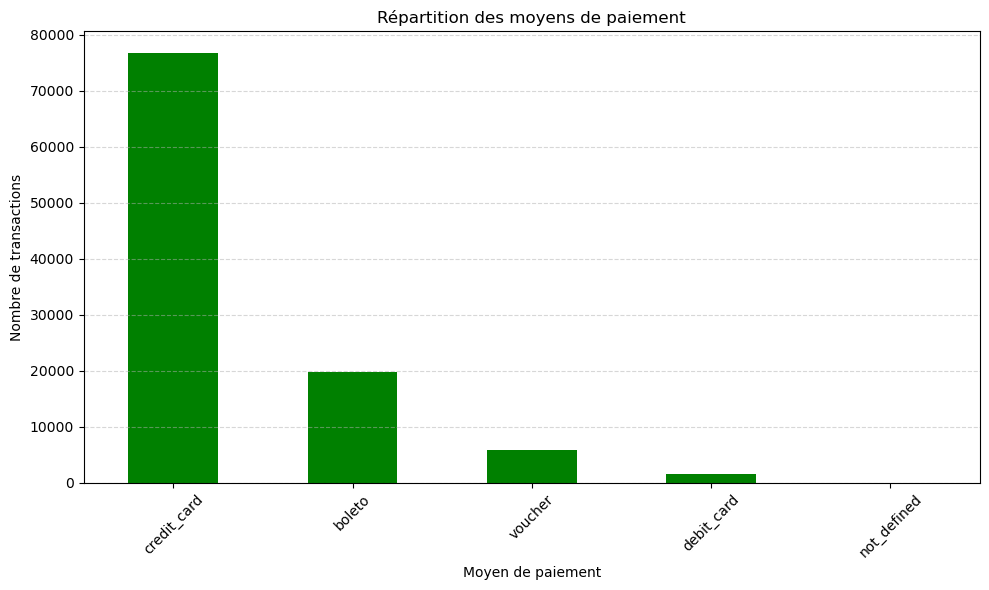

In [12]:
if 'payment_type' in order_pymts.columns:
    # Compter les occurrences de chaque moyen de paiement
    payment_counts = order_pymts['payment_type'].value_counts()
    
    # Tracer le barplot
    plt.figure(figsize=(10, 6))
    payment_counts.plot(kind='bar', color='green')
    plt.title('Répartition des moyens de paiement')
    plt.xlabel('Moyen de paiement')
    plt.ylabel('Nombre de transactions')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
else:
    print("La colonne 'payment_method' n'existe pas dans le DataFrame.")


## Barplot répartition des statuts de commande

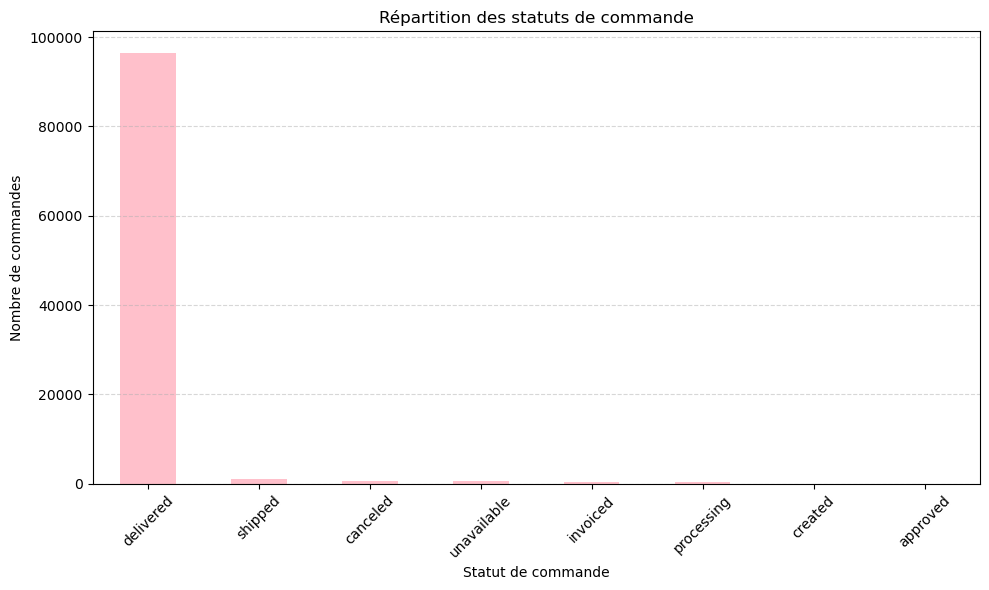

In [14]:
status_column = 'order_status'
if status_column in orders.columns:
    # Compter les occurrences de chaque statut de commande
    status_counts = orders[status_column].value_counts()
    
    # Tracer le barplot
    plt.figure(figsize=(10, 6))
    status_counts.plot(kind='bar', color='pink')
    plt.title('Répartition des statuts de commande')
    plt.xlabel('Statut de commande')
    plt.ylabel('Nombre de commandes')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
else:
    print(f"La colonne '{status_column}' n'existe pas dans le DataFrame.")


## Histogramme nombre de paiements

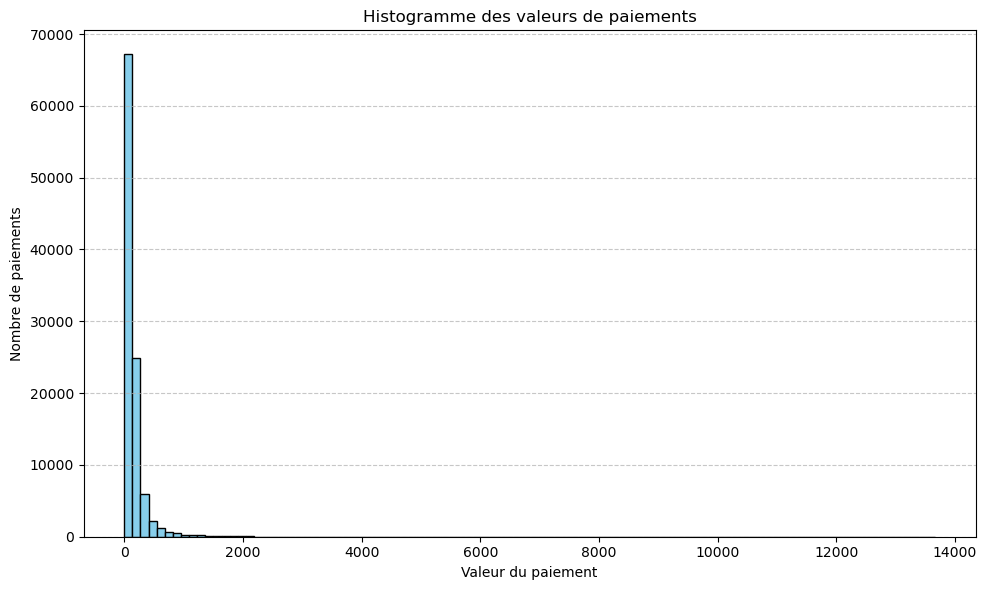

In [16]:
payment_value_column = 'payment_value'

if payment_value_column in order_pymts.columns:
    # Créer l'histogramme des valeurs de paiements
    plt.figure(figsize=(10, 6))
    plt.hist(order_pymts[payment_value_column], bins=100, color='skyblue', edgecolor='black')
    plt.title('Histogramme des valeurs de paiements')
    plt.xlabel('Valeur du paiement')
    plt.ylabel('Nombre de paiements')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print(f"La colonne '{payment_value_column}' n'existe pas dans le DataFrame.")


## Histogramme montant des commandes

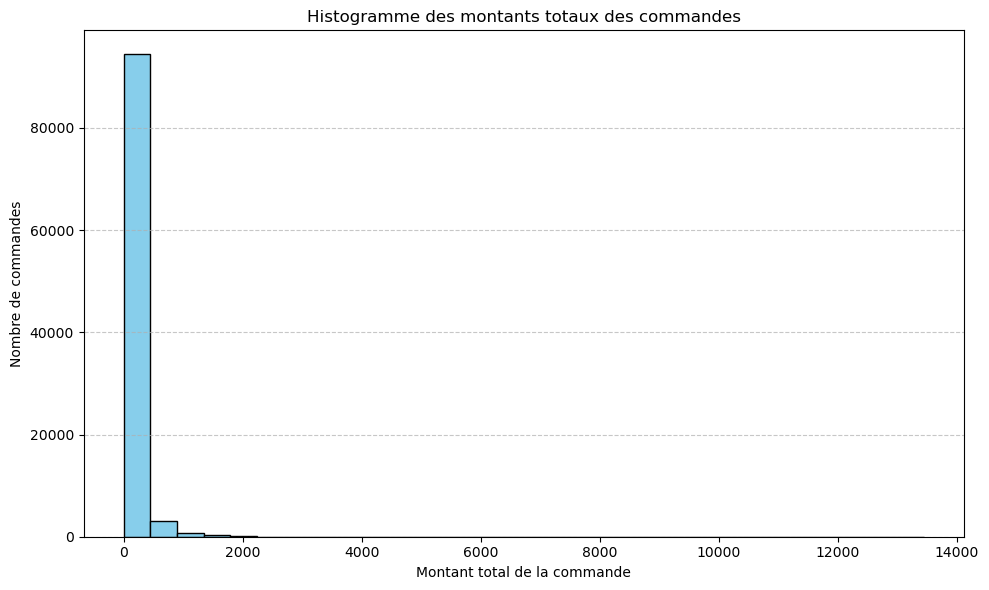

In [18]:
price_column = 'price'

if price_column in order_items.columns:
    # Calculer le montant total de chaque commande (en ne tenant compte que du prix)
    total_order_amounts = order_items.groupby('order_id')[price_column].sum()
    
    # Créer l'histogramme des montants totaux des commandes
    plt.figure(figsize=(10, 6))
    plt.hist(total_order_amounts.dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title('Histogramme des montants totaux des commandes')
    plt.xlabel('Montant total de la commande')
    plt.ylabel('Nombre de commandes')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print(f"La colonne '{price_column}' n'existe pas dans le DataFrame.")


## Nettoyage

### Commandes non livrées

In [21]:
if 'order_delivered_customer_date' in orders.columns:
    # Compter les commandes non livrées avant suppression
    non_delivered_orders_count_before = orders['order_delivered_customer_date'].isna().sum()
    print(f"Nombre de commandes non livrées avant suppression : {non_delivered_orders_count_before}")

    # Supprimer les commandes non livrées
    orders_delivered = orders.dropna(subset=['order_delivered_customer_date'])
    
    # Recalculer le nombre de commandes non livrées après suppression
    non_delivered_orders_count_after = orders_delivered['order_delivered_customer_date'].isna().sum()
    print(f"Nombre de commandes non livrées après suppression : {non_delivered_orders_count_after}")

    # Afficher le nombre total de commandes après suppression
    print(f"Nombre total de commandes après suppression : {orders_delivered.shape[0]}")
else:
    print("La colonne 'order_delivered_customer_date' n'existe pas dans le DataFrame.")


Nombre de commandes non livrées avant suppression : 2965
Nombre de commandes non livrées après suppression : 0
Nombre total de commandes après suppression : 96476


### Clients sans commande

In [23]:
# Calculer le nombre de clients sans commande après suppression des commandes non livrées
if 'customer_id' in customers.columns and 'customer_id' in orders_delivered.columns:
    # Trouver les clients avec au moins une commande dans le DataFrame filtré
    clients_with_orders = orders_delivered['customer_id'].unique()
    
    # Trouver tous les clients
    all_customers = customers['customer_id'].unique()
    
    # Trouver les clients sans commande
    clients_without_orders = set(all_customers) - set(clients_with_orders)
    
    clients_without_orders_count_after = len(clients_without_orders)
    print(f"Nombre de clients sans commande après suppression : {clients_without_orders_count_after}")

    # Nombre total de clients avant suppression
    total_customers_before = customers.shape[0]
    print(f"Nombre total de clients avant suppression des clients sans commande : {total_customers_before}")

    # Supprimer les clients sans commande du DataFrame customers
    customers_cleaned = customers[~customers['customer_id'].isin(clients_without_orders)]
    
    # Nombre total de clients après suppression
    total_customers_after = customers_cleaned.shape[0]
    print(f"Nombre total de clients après suppression des clients sans commande : {total_customers_after}")
    
    # Nombre de clients supprimés
    clients_removed = total_customers_before - total_customers_after
    print(f"Nombre de clients supprimés : {clients_removed}")
else:
    print("Les colonnes 'customer_id' dans 'customers' ou 'orders' n'existent pas dans le DataFrame.")


Nombre de clients sans commande après suppression : 2965
Nombre total de clients avant suppression des clients sans commande : 99441
Nombre total de clients après suppression des clients sans commande : 96476
Nombre de clients supprimés : 2965


# RFM

## Création des variables

In [72]:
import pandas as pd

# Assurez-vous que 'order_purchase_timestamp' est au format datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# 1. Simuler la date d'aujourd'hui
simulated_today = pd.Timestamp('2018-10-18 17:30:18')
print(f"Date simulée d'aujourd'hui : {simulated_today}")

# 2. Date de la dernière commande dans le dataset
last_order_date = orders['order_purchase_timestamp'].max()
print(f"Date de la dernière commande : {last_order_date}")

# 3. Récence : Calculer le nombre de jours depuis la dernière commande pour chaque client
recency_df = orders.groupby('customer_id').agg(last_purchase=('order_purchase_timestamp', 'max')).reset_index()

# 4. Calculer la récence pour chaque client en utilisant la date simulée
recency_df['recency'] = (simulated_today - recency_df['last_purchase']).dt.days

# Afficher les dates de la dernière commande pour les clients avec une récence faible
print("\nDates de la dernière commande pour les clients avec récence faible :")
print(recency_df.sort_values(by='last_purchase', ascending=False).head())

# 5. Fréquence : Nombre total de commandes par client
frequency_df = orders.groupby('customer_id').size().reset_index(name='frequency')

# 6. Montant : Calculer le montant total dépensé par client à partir de la table order_items (prix * quantité)
monetary_df = order_items.groupby('order_id').agg(order_value=('price', 'sum')).reset_index()
monetary_df = pd.merge(orders[['order_id', 'customer_id']], monetary_df, on='order_id')
monetary_df = monetary_df.groupby('customer_id').agg(monetary=('order_value', 'sum')).reset_index()

# 7. Fusionner les variables RFM en une seule table
rfm_df = pd.merge(recency_df[['customer_id', 'recency']], frequency_df, on='customer_id')
rfm_df = pd.merge(rfm_df, monetary_df, on='customer_id')

# 8. Trier par récence (les plus récentes commandes en premier)
rfm_sorted_by_recency = rfm_df.sort_values(by='recency')

# Afficher les clients avec la récence la plus faible
print("\nClients ayant la récence la plus faible (commandes les plus récentes) :")
print(rfm_sorted_by_recency.head())


Date simulée d'aujourd'hui : 2018-10-18 17:30:18
Date de la dernière commande : 2018-10-17 17:30:18

Dates de la dernière commande pour les clients avec récence faible :
                            customer_id       last_purchase  recency
63970  a4b417188addbc05b26b72d5e44837a1 2018-10-17 17:30:18        1
51713  856336203359aa6a61bf3826f7d84c49 2018-10-16 20:16:02        1
29531  4c2ec60c29d10c34bd49cb88aa85cfc4 2018-10-03 18:55:29       14
74611  bf6181a85bbb4115736c0a8db1a53be3 2018-10-01 15:30:09       17
15595  2823ffda607a2316375088e0d00005ec 2018-09-29 09:13:03       19

Clients ayant la récence la plus faible (commandes les plus récentes) :
                            customer_id  recency  frequency  monetary
29063  4b7decb9b58e2569548b8b4c8e20e8d7       45          1    145.00
28365  49a6ae8a95c6a78d90945b983ab1ecfc       50          1    103.69
52937  898b7fee99c4e42170ab69ba59be0a8b       50          1     84.99
4331   0b5f6687d659478f1747caed607c4ec5       50          1    

## Scoring

In [98]:
import pandas as pd

# Assurez-vous que 'order_purchase_timestamp' est au format datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# 1. Simuler la date d'aujourd'hui (18 octobre 2018)
simulated_today = pd.Timestamp('2018-10-18 17:30:18')
print(f"Date simulée d'aujourd'hui : {simulated_today}")

# 2. Date de la dernière commande dans le dataset
last_order_date = orders['order_purchase_timestamp'].max()
print(f"Date de la dernière commande : {last_order_date}")

# 3. Récence : Calculer le nombre de jours depuis la dernière commande pour chaque client
recency_df = orders.groupby('customer_id').agg(last_purchase=('order_purchase_timestamp', 'max')).reset_index()
recency_df['recency'] = (simulated_today - recency_df['last_purchase']).dt.days

# 4. Fréquence : Nombre total de commandes par client
frequency_df = orders.groupby('customer_id').size().reset_index(name='frequency')

# 5. Montant : Calculer le montant total dépensé par client à partir de la table order_items (prix * quantité)
monetary_df = order_items.groupby('order_id').agg(order_value=('price', 'sum')).reset_index()
monetary_df = pd.merge(orders[['order_id', 'customer_id']], monetary_df, on='order_id')
monetary_df = monetary_df.groupby('customer_id').agg(monetary=('order_value', 'sum')).reset_index()

# 6. Fusionner les variables RFM en une seule table
rfm_df = pd.merge(recency_df[['customer_id', 'recency']], frequency_df, on='customer_id')
rfm_df = pd.merge(rfm_df, monetary_df, on='customer_id')

# 7. Calculer le score RFM
def score_rfm(df):
    df['recency_score'] = pd.qcut(df['recency'], 4, labels=False, duplicates='drop').fillna(-1)
    df['recency_score'] = 5 - df['recency_score']  # Inverser le score de récence

    df['frequency_score'] = pd.qcut(df['frequency'], 4, labels=False, duplicates='drop').fillna(-1)
    df['frequency_score'] = 1 + df['frequency_score']  # Plus la fréquence est basse, plus le score est bas

    df['monetary_score'] = pd.qcut(df['monetary'], 4, labels=False, duplicates='drop').fillna(-1)
    df['monetary_score'] = 1 + df['monetary_score']  # Plus le montant est élevé, plus le score est élevé
    
    # Concaténer les scores dans le format "recency_score-frequency_score-monetary_score"
    df['rfm_score'] = df['recency_score'].astype(int).astype(str) + '-' + df['frequency_score'].astype(int).astype(str) + '-' + df['monetary_score'].astype(int).astype(str)
    return df

# Appliquer la fonction de scoring
rfm_df = score_rfm(rfm_df)

# Afficher les clients avec leurs scores RFM
print("\nClients avec leurs scores RFM :")
print(rfm_df[['customer_id', 'recency', 'frequency', 'monetary', 'rfm_score']].head())


Date simulée d'aujourd'hui : 2018-10-18 17:30:18
Date de la dernière commande : 2018-10-17 17:30:18

Clients avec leurs scores RFM :
                        customer_id  recency  frequency  monetary rfm_score
0  00012a2ce6f8dcda20d059ce98491703      338          1     89.80     3-0-3
1  000161a058600d5901f007fab4c27140      459          1     54.90     2-0-2
2  0001fd6190edaaf884bcaf3d49edf079      597          1    179.99     2-0-4
3  0002414f95344307404f0ace7a26f1d5      428          1    149.90     2-0-3
4  000379cdec625522490c315e70c7a9fb      199          1     93.00     4-0-3


## Graphe

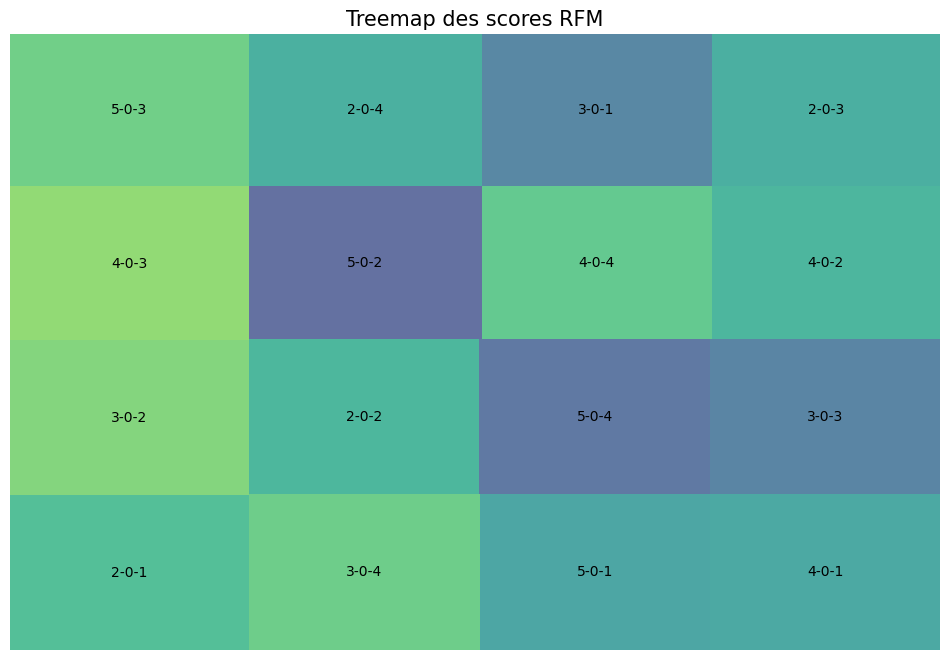

In [107]:
import matplotlib.pyplot as plt
import squarify

# Exemple de données à partir du DataFrame rfm_df
# Assurez-vous que le score RFM est bien calculé avant
rfm_scores = rfm_df['rfm_score'].value_counts()
labels = rfm_scores.index

# Créer le graphique
plt.figure(figsize=(12, 8))
squarify.plot(sizes=rfm_scores.values, label=labels, alpha=.8)
plt.title('Treemap des scores RFM', fontsize=15)
plt.axis('off')  # Masquer les axes
plt.show()
